In [1]:
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import pandas as pd

In [8]:
import networkx as nx
import pandas as pd
import random, json
import numpy as np, numpy.random
from unidecode import unidecode

class CountryGraph:
    """
    Creates a distribution of the cities spatially based on data.
    
    To represent each city properly we need to pass them as nodes, 
    and put several factors that suggest the movement of the people
    in them.
    """
    
    
    def __init__(self, country="Turkey"):
        """
        country: the country's name, that will be read from a configuration file.
        subs:    the cities and their sub-cities which will be used for mapping back.
        G:       the graph containing the cities. 
        """
        
        self.country = country
        self.subs = {}
        self.G = nx.Graph()
        # setup
        self.__read_cities()
        # transportation
        self.__update_roads()
        #self.__update_ports()
        
    def __read_cities(self):
        """Update all the cities, and the sub-cities connected to them."""
        
        self.cities = pd.read_csv("geo_data/cities_" + self.country.lower() +".csv")
        cities_subs = pd.read_csv("geo_data/cities_" + self.country.lower() + "_subs.csv")
        for e in range(len(cities_subs)):
            self.subs[ cities_subs.iloc[e]['city']] = cities_subs.iloc[e]['admin']
        for city in list(self.cities['city']):
            city_properties = self.cities[self.cities['city'] == city].iloc[0]
            self.G.add_node(City( 
                name=city_properties['city'],
                position=(city_properties['lat'], city_properties[ 'lng']),
                area=int(city_properties['Area(km²)'].replace(',','')), 
                air=0, 
                port=0))
    
    def __update_roads(self):
        """Create the connections in the graph which represent roads."""
        
        with open("geo_data/roads_turkey") as f:
            self.roads = list(json.loads( json.load( f)).values())
        road_cities = []
        for road in self.roads:
            road = self.remove_duplicates([self.subs[i] for i in road])
            road_cities += road # add the cities which are connected to this road
            for i in range(len(road)-1):
                self.G.add_edge( road[i], road[i+1], weight=10)
        road_cities = set(road_cities)
        not_found = set( self.cities['city']) - set(road_cities)
        # order cities present in list by distance to this city
        for each in not_found:
            city = self.cities[ self.cities['city'] == each].iloc[0]
            found = self.cities[ self.cities['city'].isin( road_cities)]
            found['distance'] = ((found['lat']-city['lat'])**2 
                                 + (found['lng']-city['lng'])**2)
            closest_city = found.sort_values('distance').iloc[1]['city']
            self.G.add_edge( city['city'], closest_city, weight=10)
    
    def display_graph(self):
        pos = {city:(long, lat) 
               for (city, (lat,long)) in nx.get_node_attributes(self.G, 'position').items()}
        nx.draw(self.G, pos, with_labels=False, 
                node_size=10, node_color='r', edge_color='b')
       

    def __update_ports(self):
        with open("geo_data/ports_turkey.json") as f:
            ports = json.load(f)
        for each in ports['airport']:
            self.G.nodes[self.subs[each]]['air'] = 1
        for each in ports['port']:
            self.G.nodes[self.subs[each]]['port'] = 1
    
    @staticmethod
    def remove_duplicates(seq):
        seen = set()
        seen_add = seen.add
        return [x for x in seq if not (x in seen or seen_add(x))]

In [9]:
gTurkey = CountryGraph()
#gTurkey.display_graph()

In [10]:
pos = {}
for each in gTurkey.G.nodes:
    try:
        pos[each.get_name()]=each.get_position()
    except Exception as e:
        print(each)
        print(e)
pos

Edirne
'str' object has no attribute 'get_position'
İstanbul
'str' object has no attribute 'get_position'
Kocaeli
'str' object has no attribute 'get_position'
Sakarya
'str' object has no attribute 'get_position'
Düzce
'str' object has no attribute 'get_position'
Bolu
'str' object has no attribute 'get_position'
Çankırı
'str' object has no attribute 'get_position'
Amasya
'str' object has no attribute 'get_position'
Tokat
'str' object has no attribute 'get_position'
Erzincan
'str' object has no attribute 'get_position'
Erzurum
'str' object has no attribute 'get_position'
Ağrı
'str' object has no attribute 'get_position'
Çanakkale
'str' object has no attribute 'get_position'
Balıkesir
'str' object has no attribute 'get_position'
Bursa
'str' object has no attribute 'get_position'
Eskişehir
'str' object has no attribute 'get_position'
Ankara
'str' object has no attribute 'get_position'
Kırıkkale
'str' object has no attribute 'get_position'
Yozgat
'str' object has no attribute 'get_position'

{'İstanbul': (41.011046, 28.957798),
 'Ankara': (39.911652, 32.840305),
 'İzmir': (38.412726, 27.138376),
 'Bursa': (40.195593, 29.06013),
 'Adana': (37.001667, 35.32888900000001),
 'Gaziantep': (37.059444, 37.3825),
 'Konya': (37.871354, 32.484636),
 'Antalya': (36.908118, 30.695565),
 'Trabzon': (41.005, 39.726944),
 'Diyarbakır': (37.913629, 40.217213),
 'Samsun': (41.286667, 36.33),
 'Kayseri': (38.732222, 35.485278),
 'Eskişehir': (39.776667, 30.520556),
 'Kocaeli': (40.766944, 29.916944),
 'Malatya': (38.350183, 38.316669),
 'Şanlıurfa': (37.16708, 38.793919),
 'Erzurum': (39.908611, 41.276944),
 'Kahramanmaraş': (37.584705, 36.926405),
 'Denizli': (37.774167, 29.0875),
 'Van': (38.494565, 43.383231),
 'Hatay': (36.206551, 36.157225),
 'Batman': (37.88737800000001, 41.132208),
 'Sakarya': (40.780556, 30.403333),
 'Rize': (41.020833, 40.521944),
 'Elazığ': (38.674314, 39.223206),
 'Sivas': (39.748333, 37.016111),
 'Balıkesir': (39.649167, 27.886111),
 'Manisa': (38.612018, 27.4264

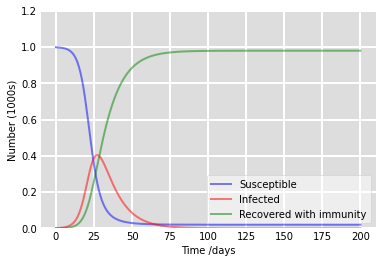

In [7]:
from SIR import SIR
sir = SIR(days=200)
sir.projection()
sir.plot_projection()